In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.imports import *

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mucositisprepped/mucositis4.xlsx


In [2]:
path ='/kaggle/input/mucositisprepped/mucositis4.xlsx'
sheet_name = 'Transpose Cleaned Data'

df = pd.read_excel(path, sheet_name=sheet_name)
df

,Name,Age,Gender,Ethnicity,Weight_Fraction1,Radiotherapy,Radiosensitiser,TotalCumulativeDose,Fraction,MucositisScoreCleaned,...,Sequence,MouthWash,MW_Dose_New,MW_Duration_New,MW1_Pain_Score_Pre,MW1_Pain_Score_Post,PainScoreDiff,MW1_Xerostomia_Score_Pre,MW1_Xerostomia_Score_Post,XerostomiaDiff
0,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,2.0,Others,15.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,1.0,Nystatin,5.0,30,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Khairuddin B.AbdGani,42.0,Male,Malay,84,NaN,Cisplatin,120.0,15,1.0,...,1.0,Benzydamine,15.0,30,4.0,2.0,2.0,1.0,0.0,1.0
986,Khairuddin B.AbdGani,42.0,Male,Malay,84,NaN,Cisplatin,120.0,15,1.0,...,2.0,Xylocaine,15.0,15,4.0,2.0,2.0,1.0,0.0,1.0
987,Khairuddin B.AbdGani,42.0,Male,Malay,84,NaN,Cisplatin,NaN,15,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,Khairuddin B.AbdGani,42.0,Male,Malay,84,NaN,Cisplatin,NaN,15,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.fillna(0)
df

,Name,Age,Gender,Ethnicity,Weight_Fraction1,Radiotherapy,Radiosensitiser,TotalCumulativeDose,Fraction,MucositisScoreCleaned,...,Sequence,MouthWash,MW_Dose_New,MW_Duration_New,MW1_Pain_Score_Pre,MW1_Pain_Score_Post,PainScoreDiff,MW1_Xerostomia_Score_Pre,MW1_Xerostomia_Score_Post,XerostomiaDiff
0,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,2.0,Others,15.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,3.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,4.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,5.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,1.0,Nystatin,5.0,30,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Khairuddin B.AbdGani,42.0,Male,Malay,84,0,Cisplatin,120.0,15,1.0,...,1.0,Benzydamine,15.0,30,4.0,2.0,2.0,1.0,0.0,1.0
986,Khairuddin B.AbdGani,42.0,Male,Malay,84,0,Cisplatin,120.0,15,1.0,...,2.0,Xylocaine,15.0,15,4.0,2.0,2.0,1.0,0.0,1.0
987,Khairuddin B.AbdGani,42.0,Male,Malay,84,0,Cisplatin,0.0,15,1.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
988,Khairuddin B.AbdGani,42.0,Male,Malay,84,0,Cisplatin,0.0,15,1.0,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df['MouthWash'] = df['MouthWash'].replace('Oral7', 'Oralseven')
df['MouthWash'] = df['MouthWash'].replace(0, 'zero')
df['Radiotherapy'] = df['Radiotherapy'].replace(0, 'zero')
df['MouthWash'] = df['MouthWash'].replace('Xylocaine', 'Lignocaine')
df['MouthWash'] = df['MouthWash'].replace('NaHC03', 'bicarb')
df['Systemic_Analgesics'] = df['Systemic_Analgesics'].replace(0, 'zero')
df['Weight_Fraction1'] = pd.to_numeric(df['Weight_Fraction1'].replace('54.5kg', 54), errors='coerce')

/tmp/ipykernel_26/3674663021.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weight_Fraction1'] = pd.to_numeric(df['Weight_Fraction1'].replace('54.5kg', 54), errors='coerce')


In [5]:
df.drop(df[df['MouthWash'] == 'zero'].index, inplace=True)

In [6]:
df.columns

Index(['Name', 'Age', 'Gender', 'Ethnicity', 'Weight_Fraction1',
       'Radiotherapy', 'Radiosensitiser', 'TotalCumulativeDose', 'Fraction',
       'MucositisScoreCleaned', 'WeightLossF1', 'RT_PEGTube2',
       'Oral_Mucosa_Infection', 'Bacterial', 'Candidiasis',
       'Systemic_Analgesics', 'Fraction_New', 'Sequence', 'MouthWash',
       'MW_Dose_New', 'MW_Duration_New', 'MW1_Pain_Score_Pre',
       'MW1_Pain_Score_Post', 'PainScoreDiff', 'MW1_Xerostomia_Score_Pre',
       'MW1_Xerostomia_Score_Post', 'XerostomiaDiff'],
      dtype='object')

In [7]:
df

,Name,Age,Gender,Ethnicity,Weight_Fraction1,Radiotherapy,Radiosensitiser,TotalCumulativeDose,Fraction,MucositisScoreCleaned,...,Sequence,MouthWash,MW_Dose_New,MW_Duration_New,MW1_Pain_Score_Pre,MW1_Pain_Score_Post,PainScoreDiff,MW1_Xerostomia_Score_Pre,MW1_Xerostomia_Score_Post,XerostomiaDiff
0,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,2.0,Others,15.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,80.0,15,1.0,...,1.0,Nystatin,5.0,30,0.0,0.0,0.0,0.0,0.0,0.0
8,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,200.0,25,1.0,...,1.0,Benzydamine,15.0,60,0.0,0.0,0.0,2.0,2.0,0.0
9,Samsuri Azhar,37.0,Male,Malay,88.6,Dcrt,Cisplatin,200.0,25,1.0,...,2.0,Nystatin,5.0,20,7.0,4.0,3.0,2.0,1.0,1.0
10,Foong Kam Wah,51.0,Male,Chinese,77.8,Dcrt,Cisplatin,160.0,15,1.0,...,2.0,Benzydamine,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Loh Kee Seong,55.0,Male,Chinese,86.2,IMRT,Cisplatin,200.0,34,1.0,...,2.0,Nystatin,5.0,15,0.0,0.0,0.0,1.0,0.0,1.0
980,Kong Gim Wah,71.0,Male,Chinese,64.1,zero,Cisplatin,120.0,15,0.0,...,1.0,Benzydamine,15.0,120,0.0,0.0,0.0,0.0,0.0,0.0
981,Kong Gim Wah,71.0,Male,Chinese,64.1,zero,Cisplatin,120.0,15,0.0,...,2.0,Nystatin,5.0,120,0.0,0.0,0.0,0.0,0.0,0.0
985,Khairuddin B.AbdGani,42.0,Male,Malay,84.0,zero,Cisplatin,120.0,15,1.0,...,1.0,Benzydamine,15.0,30,4.0,2.0,2.0,1.0,0.0,1.0


In [8]:
cats=['Gender', 'Ethnicity', 'Radiosensitiser','RT_PEGTube2','MucositisScoreCleaned', 'Radiotherapy', 'Name', 'Oral_Mucosa_Infection', 'Bacterial', 'Candidiasis']
conts=['Age', 'Weight_Fraction1', 'WeightLossF1', 'TotalCumulativeDose', 'Fraction', 'MW_Dose_New', 'MW_Duration_New', 'MW1_Pain_Score_Pre',
       'MW1_Pain_Score_Post', 'PainScoreDiff', 'MW1_Xerostomia_Score_Pre',
       'MW1_Xerostomia_Score_Post', 'XerostomiaDiff']
dep='MouthWash'

In [9]:
# Assuming df is your DataFrame
columns_to_convert = conts

In [10]:
# Replace 'No' with 0 in the specified columns
df[columns_to_convert] = df[columns_to_convert].replace('No', 0).infer_objects()

/tmp/ipykernel_26/2204081908.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace('No', 0).infer_objects()


In [11]:


# Convert columns to float after replacing 'No' with 0
for col in columns_to_convert:
    df[col] = df[col].astype(float)

In [12]:
from sklearn.preprocessing import LabelEncoder
columns_to_convert = cats
label_encoder = LabelEncoder()
for col in columns_to_convert:
    df[col] = label_encoder.fit_transform(df[col])

In [13]:
df[dep] = label_encoder.fit_transform(df[dep])

In [14]:
encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Encoded Mapping:", encoded_mapping)


Encoded Mapping: {'Aspirin': 0, 'Benzydamine': 1, 'Lignocaine': 2, 'MagicMW': 3, 'NaHCO3': 4, 'Nystatin': 5, 'Oralseven': 6, 'Others': 7}


In [15]:
df[dep].head()

0     7
4     5
8     1
9     5
10    1
Name: MouthWash, dtype: int64

In [16]:
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

In [18]:
trn_xs, trn_y = xs_y(df)
X_train, X_valid, y_train, y_valid = train_test_split(trn_xs, trn_y, test_size=0.25, random_state=12)

In [19]:
len(X_valid)

145

In [20]:
# Create a RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=50, random_state=20, min_samples_split=10, oob_score=True)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the validation set
predictions = rf.predict(X_valid)

mae = mean_absolute_error(y_valid, predictions)
print(f'error: {mae}')

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_valid, predictions)
print(f'Accuracy: {accuracy}')

error: 0.9793103448275862
Accuracy: 0.496551724137931


In [21]:
row_to_predict = X_valid
prediction = rf.predict(row_to_predict)
prediction

array([5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 5, 5, 5, 5, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 2, 1, 1,
       1, 5, 5, 5, 1, 2, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1,
       1, 1, 5, 2, 5, 1, 2, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1, 1,
       5, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
y_valid

707    5
635    2
364    2
862    1
33     2
      ..
70     1
665    2
775    4
248    1
495    1
Name: MouthWash, Length: 145, dtype: int64

In [23]:
result_df = pd.DataFrame({'Predicted': prediction, 'Actual': y_valid})
result_df

,Predicted,Actual
707,5,5
635,1,2
364,1,2
862,1,1
33,1,2
...,...,...
70,1,1
665,1,2
775,1,4
248,1,1


In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(result_df)

,Predicted,Actual
707,5,5
635,1,2
364,1,2
862,1,1
33,1,2
341,1,1
785,1,1
372,1,1
9,5,5
646,1,2


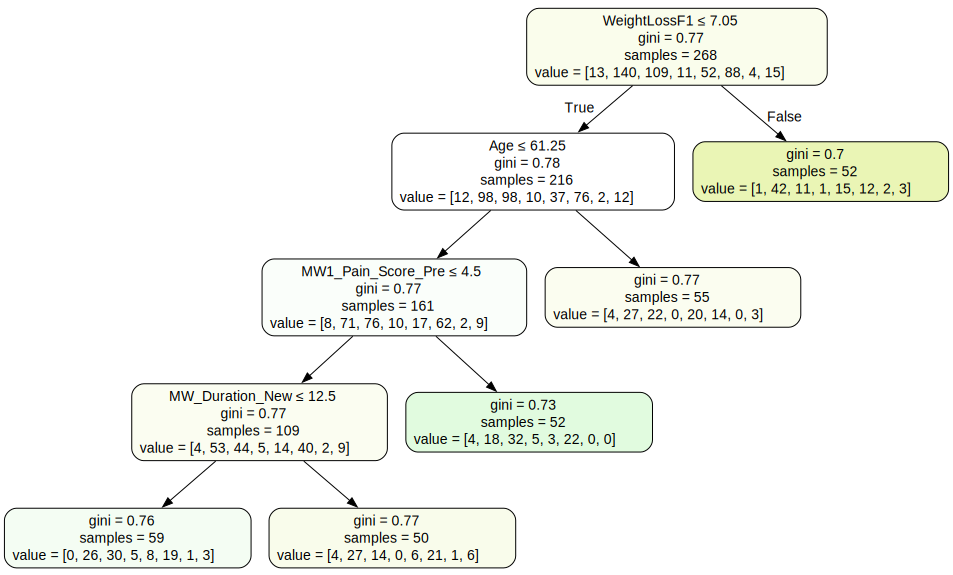

In [25]:
from sklearn.tree import export_graphviz
import graphviz

def draw_tree(rf, df, size=50, ratio=0.6, precision=2, tree_index=0, **kwargs):
    # Extract one tree from the Random Forest
    t = rf.estimators_[tree_index]
    
    # Generate the graphviz representation for the tree
    s = export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                        special_characters=True, rotate=False, precision=precision, **kwargs)
    
    # Create a graphviz.Source object and set size and ratio
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

# Now, you can use the draw_tree function with your RandomForestClassifier
draw_tree(rf, trn_xs, size=50, ratio=0.6)

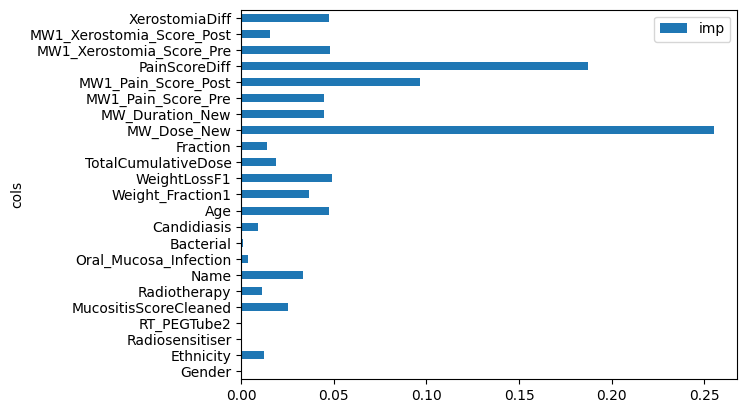

In [26]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=rf.feature_importances_)).plot('cols', 'imp', 'barh');

In [27]:
# trn_xs, trn_y = xs_y(df)
# X_train, X_valid, y_train, y_valid = train_test_split(trn_xs, trn_y, test_size=0.25, random_state=12)

In [28]:
print("Classification Report:\n", classification_report(y_valid, prediction))
print("Confusion Matrix:\n", confusion_matrix(y_valid, prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.43      0.92      0.58        50
           2       0.43      0.08      0.14        37
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        18
           5       0.77      0.96      0.85        24
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5

    accuracy                           0.50       145
   macro avg       0.20      0.24      0.20       145
weighted avg       0.38      0.50      0.38       145

Confusion Matrix:
 [[ 0  5  0  0  0  0  0  0]
 [ 0 46  4  0  0  0  0  0]
 [ 0 31  3  0  0  3  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0]
 [ 0  1  0  0  0 23  0  0]
 [ 0  1  0  0  0  2  0  0]
 [ 0  3  0  0  0  2  0  0]]


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


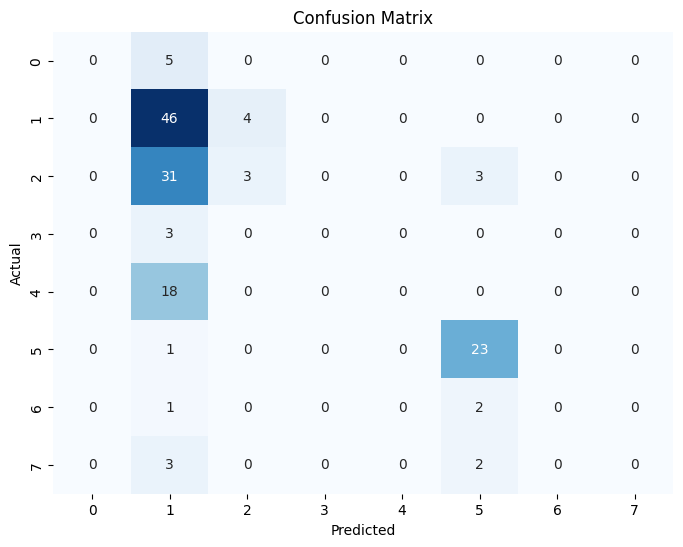

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your actual and predicted labels
conf_matrix = confusion_matrix(y_valid, prediction)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
#            
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#